In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro, pearsonr, ttest_rel, wilcoxon
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

1. An engineer is studying the effect of temperature and stirring rate on the yield of a certain product. The process is run 16 times, at the settings indicated in the following table. The units for yield are percent of a theoretical maximum.

In [ ]:
# Data from the table
temperature = np.array([110, 110, 111, 111, 112, 112, 114, 114, 117, 117, 122, 122, 130, 130, 143, 143])
stirring_rate = np.array([30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60])
yield_percent = np.array([70.27, 72.29, 72.57, 74.69, 76.09, 73.14, 75.61, 69.56, 74.41, 73.49, 79.18, 75.44, 81.71, 83.03, 76.98, 80.99])

In [ ]:
# a. Shapiro-Wilk test for normality
temp_normality = shapiro(temperature)
stir_normality = shapiro(stirring_rate)
yield_normality = shapiro(yield_percent)

print("\nShapiro-Wilk Test for Normality:")
print(f"Temperature: Statistic={temp_normality.statistic:.4f}, p-value={temp_normality.pvalue:.4f}")
print(f"Stirring Rate: Statistic={stir_normality.statistic:.4f}, p-value={stir_normality.pvalue:.4f}")
print(f"Yield: Statistic={yield_normality.statistic:.4f}, p-value={yield_normality.pvalue:.4f}\n")

if temp_normality.pvalue > 0.05:
    print("Temperature data is normally distributed.")
else:
    print("Temperature data is not normally distributed.")
if stir_normality.pvalue > 0.05:
    print("Stirring Rate data is normally distributed.")
else:
    print("Stirring Rate data is not normally distributed.")
if yield_normality.pvalue > 0.05:
    print("Yield data is normally distributed.")
else:
    print("Yield data is not normally distributed.")


Shapiro-Wilk Test for Normality:
Temperature: Statistic=0.8118, p-value=0.0039
Stirring Rate: Statistic=0.9628, p-value=0.7123
Yield: Statistic=0.9540, p-value=0.5556

Temperature data is not normally distributed.
Stirring Rate data is normally distributed.
Yield data is normally distributed.


In [ ]:
# b. Pearson correlation between stirring rate and yield
correlation, p_value = pearsonr(stirring_rate, yield_percent)

print("\nCorrelation between Stirring Rate and Yield:")
print(f"Pearson Correlation Coefficient={correlation:.4f}, p-value={p_value:.4f}\n")

if p_value < 0.05:
    print("There is a significant correlation between Stirring Rate and Yield.")
else:
    print("There is no significant correlation between Stirring Rate and Yield.")


Correlation between Stirring Rate and Yield:
Pearson Correlation Coefficient=0.7513, p-value=0.0008

There is a significant correlation between Stirring Rate and Yield.


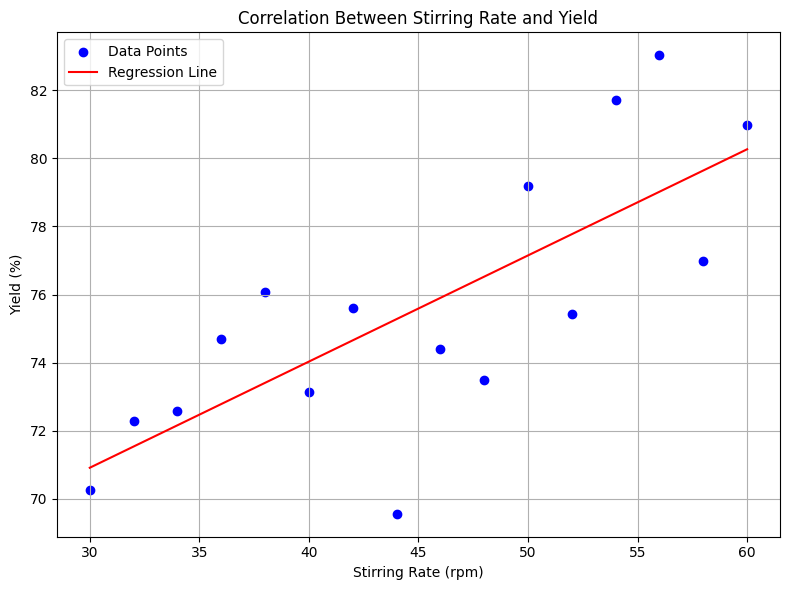

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(stirring_rate, yield_percent, color='blue', label='Data Points')
m, b = np.polyfit(stirring_rate, yield_percent, 1)  # Linear regression line
plt.plot(stirring_rate, m * stirring_rate + b, color='red', label='Regression Line')

plt.title('Correlation Between Stirring Rate and Yield')
plt.xlabel('Stirring Rate (rpm)')
plt.ylabel('Yield (%)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

2. The following table presents shear strengths (in kN/mm) and weld diameters (in mm) for a sample of spot welds.

In [ ]:
# Data from the table
diameter = np.array([4.2, 4.4, 4.6, 4.8, 5.0, 5.2, 5.4, 5.6, 5.8, 6.0])
strength = np.array([51, 54, 69, 81, 75, 79, 89, 101, 98, 102])

In [ ]:
# a. Construct linear function (y = mx + b)
m, b = np.polyfit(diameter, strength, 1)

print("\na. Linear Function:")
print(f"   Strength = {m:.2f} * Diameter - ({-b:.2f})" if b < 0 else f"   Strength = {m:.2f} * Diameter + {b:.2f}")


a. Linear Function:
   Strength = 28.94 * Diameter - (67.69)


In [ ]:
# b. Predict strength for diameter = 5.5 mm
predicted_strength = m * 5.5 + b

print("\nb. Predicted Strength for Diameter = 5.5 mm:")
print(f"   Predicted Strength = {predicted_strength:.2f} kN/mm")


b. Predicted Strength for Diameter = 5.5 mm:
   Predicted Strength = 91.48 kN/mm


In [ ]:
# c. Solve for diameter when strength = 95
predicted_diameter = (95 - b) / m

print("\nc. Predicted Diameter for Strength = 95 kN/mm:")
print(f"   Required Diameter = {predicted_diameter:.2f} mm")


c. Predicted Diameter for Strength = 95 kN/mm:
   Required Diameter = 5.62 mm


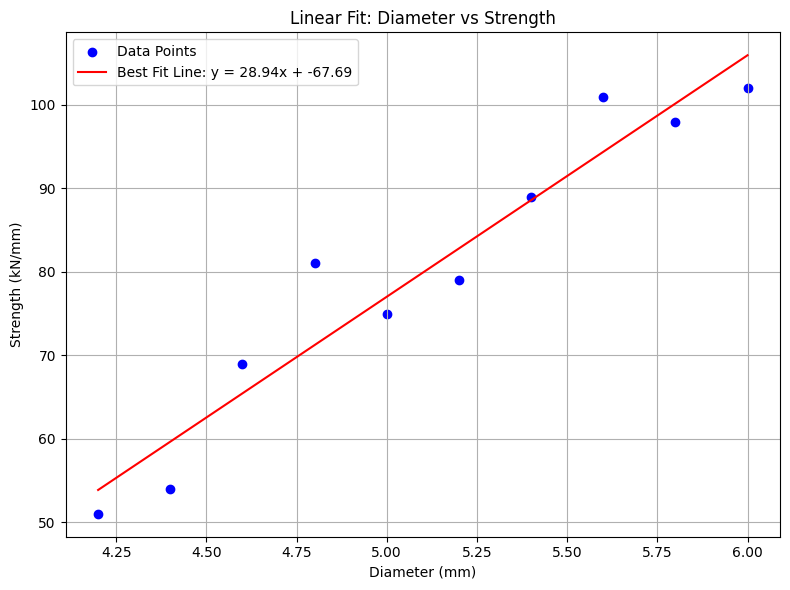

(np.float64(28.9393939393939),
 np.float64(-67.69090909090882),
 np.float64(91.47575757575761),
 np.float64(5.62178010471204))

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(diameter, strength, color='blue', label='Data Points')
plt.plot(diameter, m * diameter + b, color='red', label=f'Best Fit Line: y = {m:.2f}x + {b:.2f}')
plt.title('Linear Fit: Diameter vs Strength')
plt.xlabel('Diameter (mm)')
plt.ylabel('Strength (kN/mm)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Output results
m, b, predicted_strength, predicted_diameter

3. The Valsalva maneuver involves blowing into a closed tube in order to create pressure in respirator airways. Impedance cardiography is used during this maneuver to assess cardiac function. The article “Impedance Cardiographic Measurement of the Physiological Response to the Valsalva Manoeuvre” (R. Patterson and J. Zhang, Medical and Biological Engineering and Computing, 2003: 40–43) presents a study in which the impedance ratio was measured for each of 11 subjects in both a standing and a reclining position. They want to show that reclining position is the better situation. The following are the data:

In [ ]:
# Data from the table
subjects = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
standing = [1.45, 1.71, 1.81, 1.01, 0.96, 0.83, 1.23, 1.00, 0.80, 1.03, 1.39]
reclining = [0.98, 1.42, 0.70, 1.10, 0.78, 0.54, 1.34, 0.72, 0.75, 0.82, 0.60]
differences = [s - r for s, r in zip(standing, reclining)]

In [ ]:
# (a) Check normality using Shapiro-Wilk test
stat_standing, p_standing = stats.shapiro(standing)
stat_reclining, p_reclining = stats.shapiro(reclining)
stat_diff, p_diff = stats.shapiro(differences)

print("\n(a) Normality Test Results:")
print(f"Shapiro-Wilk Test for Standing: Statistic = {stat_standing:.3f}, p-value = {p_standing:.3f}")
print(f"Shapiro-Wilk Test for Reclining: Statistic = {stat_reclining:.3f}, p-value = {p_reclining:.3f}")
print(f"Shapiro-Wilk Test for Differences: Statistic = {stat_diff:.3f}, p-value = {p_diff:.3f}")
print("Note: p-value > 0.05 suggests normality.")


(a) Normality Test Results:
Shapiro-Wilk Test for Standing: Statistic = 0.907, p-value = 0.224
Shapiro-Wilk Test for Reclining: Statistic = 0.899, p-value = 0.178
Shapiro-Wilk Test for Differences: Statistic = 0.896, p-value = 0.167
Note: p-value > 0.05 suggests normality.


In [ ]:
# (b) Paired t-test to check for difference in means
t_stat, p_value = stats.ttest_rel(standing, reclining)

print("\n(b) Paired t-test Results:")
print(f"t-statistic = {t_stat:.3f}")
print(f"p-value = {p_value:.3f}")
print("Note: p-value < 0.05 suggests a significant difference.")


(b) Paired t-test Results:
t-statistic = 2.871
p-value = 0.017
Note: p-value < 0.05 suggests a significant difference.


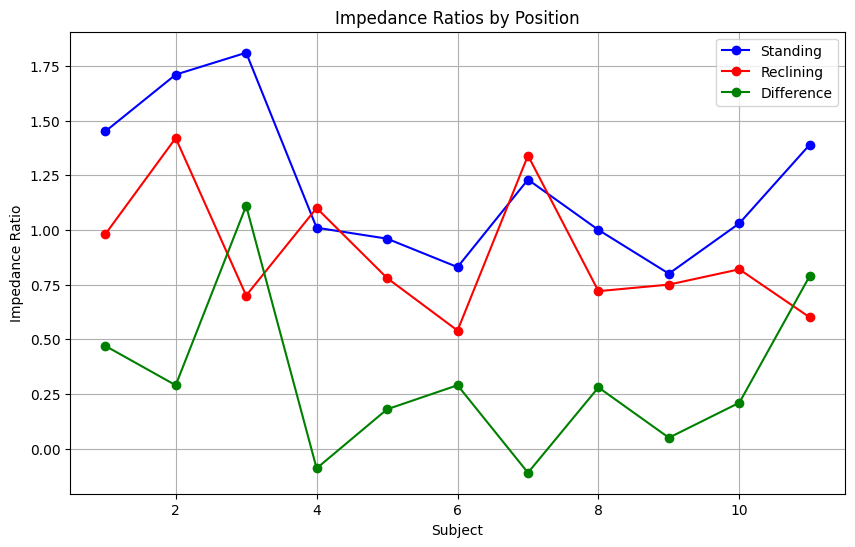

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(subjects, standing, 'bo-', label='Standing')
plt.plot(subjects, reclining, 'ro-', label='Reclining')
plt.plot(subjects, differences, 'go-', label='Difference')
plt.xlabel('Subject')
plt.ylabel('Impedance Ratio')
plt.title('Impedance Ratios by Position')
plt.legend()
plt.grid(True)
plt.show()

4. In a comparison of the effectiveness of distance learning with traditional classroom instruction, 12 students took a engineering data analysis course online, while 14 students took it in a classroom. The final exam scores were as follows.

In [ ]:
# Data from the image
online_scores = [66, 75, 85, 64, 88, 77, 74, 91, 72, 69, 77, 83]
classroom_scores = [80, 83, 64, 81, 75, 80, 86, 81, 51, 64, 59, 85, 74, 77]

In [ ]:
# (a) Check normality using Shapiro-Wilk test
stat_online, p_online = stats.shapiro(online_scores)
stat_classroom, p_classroom = stats.shapiro(classroom_scores)

print("\n(a) Normality Test Results:")
print(f"Shapiro-Wilk Test for Online: Statistic = {stat_online:.3f}, p-value = {p_online:.3f}")
print(f"Shapiro-Wilk Test for Classroom: Statistic = {stat_classroom:.3f}, p-value = {p_classroom:.3f}")
print("Note: p-value > 0.05 suggests normality.")


(a) Normality Test Results:
Shapiro-Wilk Test for Online: Statistic = 0.966, p-value = 0.859
Shapiro-Wilk Test for Classroom: Statistic = 0.879, p-value = 0.055
Note: p-value > 0.05 suggests normality.


In [ ]:
# (b) Independent t-test to check for difference in means
t_stat, p_value = stats.ttest_ind(online_scores, classroom_scores, equal_var=False)

print("\n(b) Independent t-test Results:")
print(f"t-statistic = {t_stat:.4f}")
print(f"p-value = {p_value:.4f}")
print("Note: p-value < 0.05 suggests a significant difference.")


(b) Independent t-test Results:
t-statistic = 0.6528
p-value = 0.5201
Note: p-value < 0.05 suggests a significant difference.


<ipython-input-22-3874596375>:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([online_scores, classroom_scores], labels=['Online', 'Classroom'])


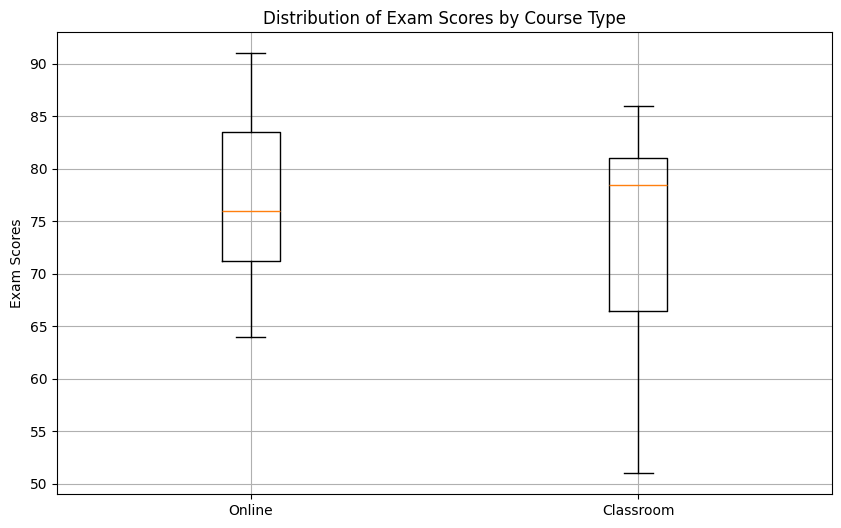

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot([online_scores, classroom_scores], labels=['Online', 'Classroom'])
plt.ylabel('Exam Scores')
plt.title('Distribution of Exam Scores by Course Type')
plt.grid(True)
plt.show()